# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)
cities

['mataura',
 'rikitea',
 'hermanus',
 'grand river south east',
 'saleaula',
 'arraial do cabo',
 'cidreira',
 'taft',
 'hasaki',
 'marrakesh',
 'tasiilaq',
 'praxedis guerrero',
 'pevek',
 'altamira',
 'riyadh',
 'te anau',
 'lethem',
 'butaritari',
 'mys shmidta',
 'nouna',
 'camacha',
 'khatanga',
 'nguiu',
 'jamestown',
 'saskylakh',
 'tiksi',
 'cape town',
 'nouadhibou',
 'nantucket',
 'atuona',
 'pacific grove',
 'provideniya',
 'barrow',
 'tuktoyaktuk',
 'tadine',
 'yellowknife',
 'dikson',
 'castro',
 'lebu',
 'jieshi',
 'esperance',
 'new norfolk',
 'adrar',
 'marienburg',
 'necochea',
 'albany',
 'hilo',
 'gao',
 'san patricio',
 'buraydah',
 'upernavik',
 'aklavik',
 'kimparana',
 'ilulissat',
 'nizhneyansk',
 'mercedes',
 'punta arenas',
 'vaini',
 'kodiak',
 'puerto ayora',
 'san vicente',
 'yulara',
 'harper',
 'bluff',
 'kalmunai',
 'busselton',
 'bredasdorp',
 'ostrovnoy',
 'yucca valley',
 'illoqqortoormiut',
 'araouane',
 'tigil',
 'naze',
 'port alfred',
 'trairi',
 

In [8]:
# My Code

# city_coordinates = pd.DataFrame(cities, lat_lng)

cities_df = pd.DataFrame(cities)
cities_df.columns = ['City']
# cities_df['City'].astype(str)
# cities_df['City'].dtype
# cities_df.head()
cities_df["City"][0]


'mataura'

In [9]:
# Define variables and request url

url = f'https://api.openweathermap.org/data/2.5/weather?q={cities_df["City"][0]}&appid={weather_api_key}&units=imperial'
results = requests.get(url).json()
# print(response)
print(json.dumps(results, indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.1927,
        "lon": 168.8643
    },
    "dt": 1668788476,
    "id": 6201424,
    "main": {
        "feels_like": 54.88,
        "grnd_level": 995,
        "humidity": 89,
        "pressure": 1002,
        "sea_level": 1002,
        "temp": 55.45,
        "temp_max": 55.45,
        "temp_min": 55.45
    },
    "name": "Mataura",
    "sys": {
        "country": "NZ",
        "sunrise": 1668790718,
        "sunset": 1668844875
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 79,
        "gust": 22.68,
        "speed": 7.07
    }
}


In [10]:
test = results["wind"]['speed']
test

7.07

In [11]:
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max_Temp'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind_Speed'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,mataura,,,,,,,,
1,rikitea,,,,,,,,
2,hermanus,,,,,,,,
3,grand river south east,,,,,,,,
4,saleaula,,,,,,,,


In [29]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={cities_df['City'][index]}&appid={weather_api_key}&units=imperial'

for index, row in cities_df.iterrows():

    current_city = row['City']

    print(f'Processing Record {index} of Set {row} | {current_city}')
    
    # current_city = row['City']
    results = requests.get(url).json()

    print(results['name'])
    # response

    # # results = response
    # try:
        
        

    #     cities_df.loc[index, 'Lat'] = results['coord']['lat']
    #     cities_df.loc[index, 'Lng'] = results['coord']['lon']
    #     cities_df.loc[index, 'Max_Temp'] = results['main']['temp_max']
    #     cities_df.loc[index, 'Humidity'] = results['main']['humidity']
    #     cities_df.loc[index, 'Cloudiness'] = results['clouds']['all']
    #     cities_df.loc[index, 'Wind_speed'] = results['wind']['speed']
    #     cities_df.loc[index, 'Country'] = results['sys']['country']
    #     cities_df.loc[index, 'Date'] = results['dt']

    # except (KeyError, IndexError):
    #     print('City not found. Skipping...')
        
    # print("------------")
        
        


SyntaxError: f-string: unmatched '[' (821439759.py, line 1)

In [24]:
cities_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,constitucion,,,,,,,,
1,hilo,,,,,,,,
2,pangnirtung,,,,,,,,
3,bonavista,,,,,,,,
4,qaanaaq,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={cities_df['City']}&appid={weather_api_key}&units=imperial'

for index, row in cities_df.iterrows():

    current_city = row['City']
    print(f'Processing Record {index} of Set {row} | {current_city}')
    response = requests.get(url).json()
    results = response['results']
    
    try:
        
        

        cities_df.loc[index, 'Lat'] = results['coord']['lat']
        cities_df.loc[index, 'Lng'] = results['coord']['lon']
        cities_df.loc[index, 'Max_Temp'] = results['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = results['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = results['clouds']['all']
        cities_df.loc[index, 'Wind_speed'] = results['wind']['speed']
        cities_df.loc[index, 'Country'] = results['sys']['country']
        cities_df.loc[index, 'Date'] = results['dt']

    except (KeyError):
        
        print('City not found. Skipping...')


SyntaxError: f-string: unmatched '[' (3077774380.py, line 1)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities_df.to_csv('cities_test.csv')

In [20]:
path = 'output_data/cities.csv'
city_test = pd.read_csv(path, encoding='utf-8')
# city_test = pd.DataFrame('/output_data/cities.csv')
city_test.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
for humid in city_test:
    number = city_test.loc[city_test['Humidity'] > 100].index
city_test.count()


City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [47]:
#  Get the indices of cities that have humidity over 100%.
cities_clean_data = city_test.loc[city_test['City_ID'] != 129]
cities_clean_data.head()

# cities_clean.to_csv('cities_clean.csv')

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [50]:
cities_clean_data.sort_values(['Lat'])


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
17,17,ushuaia,75,AR,1558378606,75,-54.81,-68.31,44.60,36.91
27,27,punta arenas,40,CL,1558378759,61,-53.16,-70.91,50.00,46.08
202,202,rio gallegos,0,AR,1558378754,40,-51.62,-69.22,53.60,34.45
51,51,mar del plata,5,AR,1558378763,33,-46.43,-67.52,50.10,18.52
185,185,kaitangata,16,NZ,1558378789,67,-46.28,169.85,52.00,10.00
...,...,...,...,...,...,...,...,...,...,...
55,55,khatanga,10,RU,1558378764,92,71.98,102.47,9.96,10.94
309,309,upernavik,0,GL,1558378846,85,72.79,-56.15,29.22,11.59
66,66,dikson,12,RU,1558378766,85,73.51,80.55,20.22,12.15
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

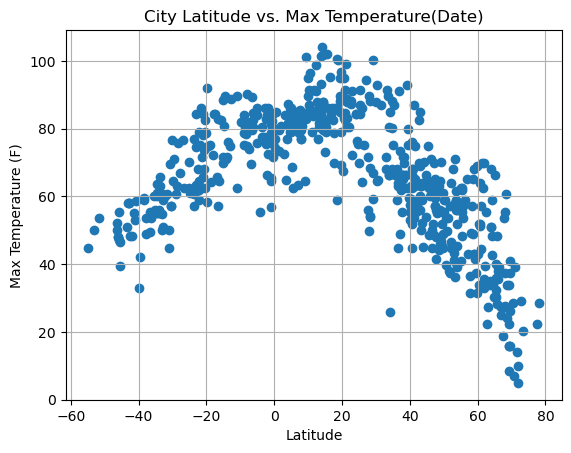

In [56]:
plt.scatter(cities_clean_data['Lat'], cities_clean_data['Max Temp'])
plt.title('City Latitude vs. Max Temperature(Date)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

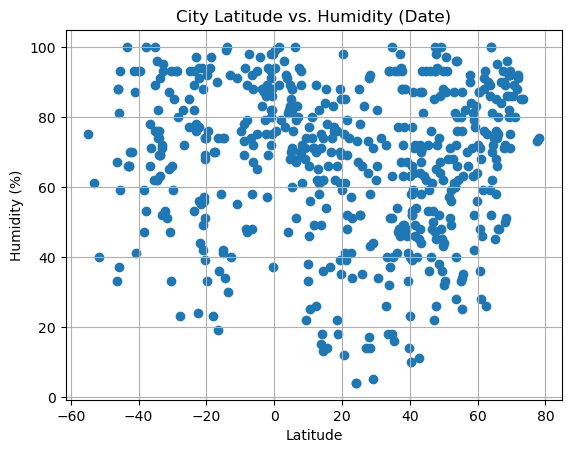

In [57]:
plt.scatter(cities_clean_data['Lat'], cities_clean_data['Humidity'])
plt.title('City Latitude vs. Humidity (Date)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

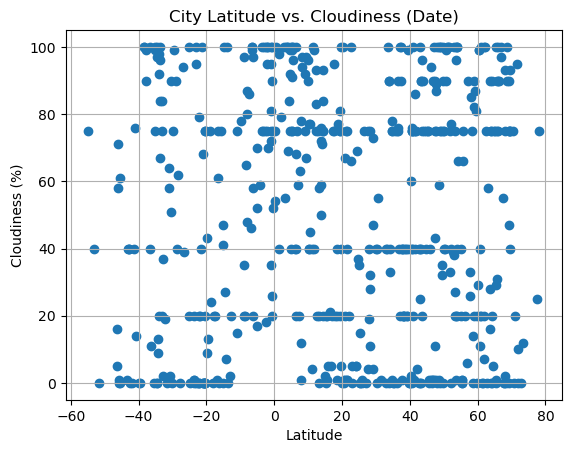

In [58]:
plt.scatter(cities_clean_data['Lat'], cities_clean_data['Cloudiness'])
plt.title('City Latitude vs. Cloudiness (Date)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

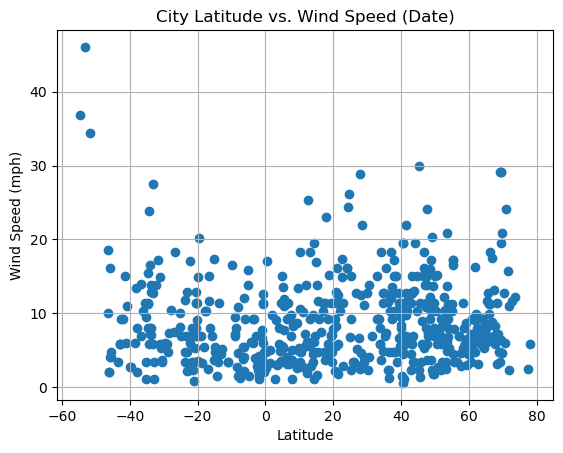

In [61]:
plt.scatter(cities_clean_data['Lat'], cities_clean_data['Wind Speed'])
plt.title('City Latitude vs. Wind Speed (Date)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [65]:
north_hem = cities_clean_data.loc[cities_clean_data['Lat'] > 0]
south_hem = cities_clean_data.loc[cities_clean_data['Lat'] < 0]
north_hem.head()



,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

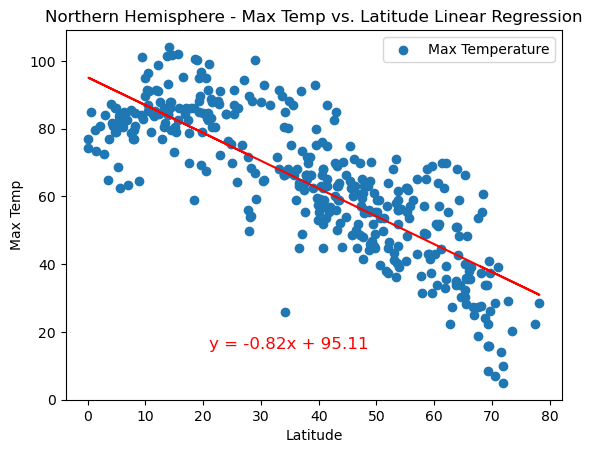

The r-value is -0.82


In [84]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Max Temp'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Max Temp'])
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (21, 15), fontsize=12, color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend(['Max Temperature'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('scatter_reg.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

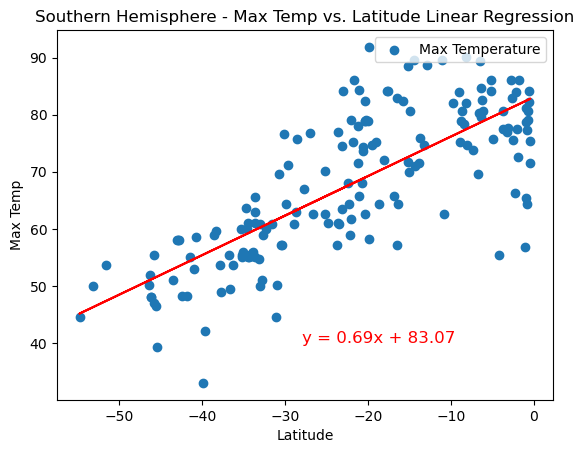

The r-value is 0.77


In [85]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Max Temp'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Max Temp'])
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-28, 40), fontsize=12, color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend(['Max Temperature'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

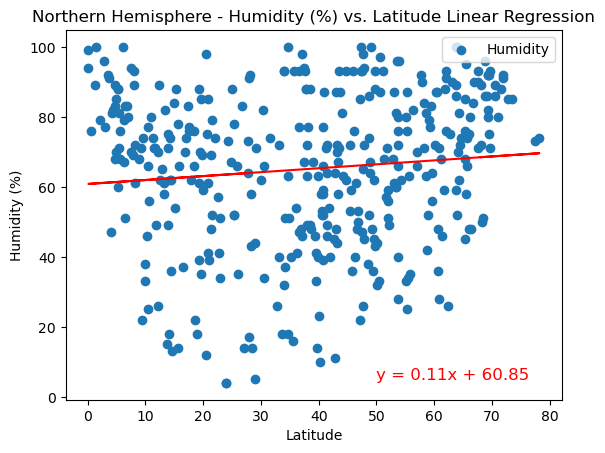

The r-value is 0.1


In [89]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Humidity'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Humidity'])
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (50, 5), fontsize=12, color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.legend(['Humidity'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_reg.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

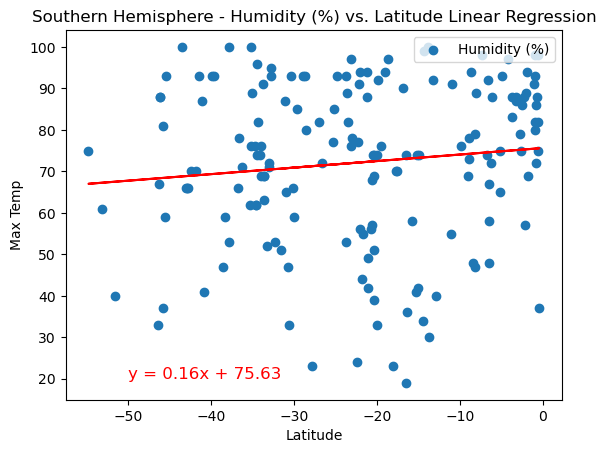

The r-value is 0.11


In [88]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Humidity'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Humidity'])
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-50, 20), fontsize=12, color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.legend(['Humidity (%)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

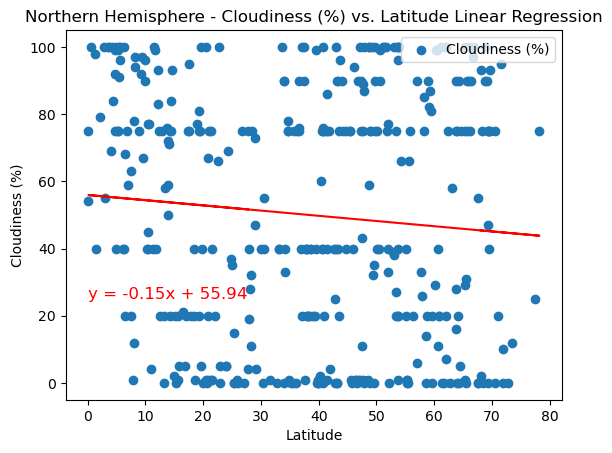

The r-value is -0.09


In [94]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Cloudiness'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Cloudiness'])
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (0, 25), fontsize=12, color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.legend(['Cloudiness (%)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_reg.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

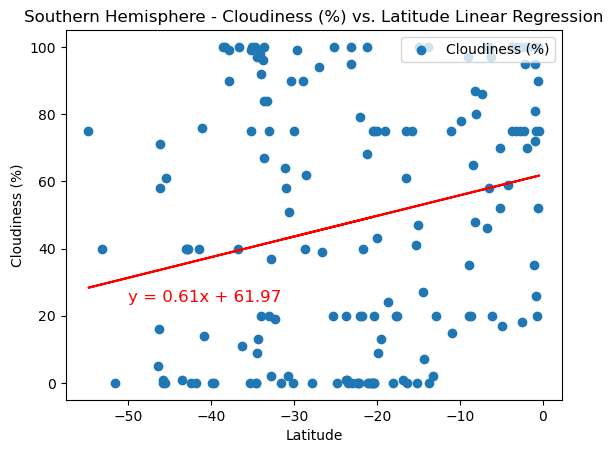

The r-value is 0.23


In [93]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Cloudiness'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Cloudiness'])
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-50, 24), fontsize=12, color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.legend(['Cloudiness (%)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

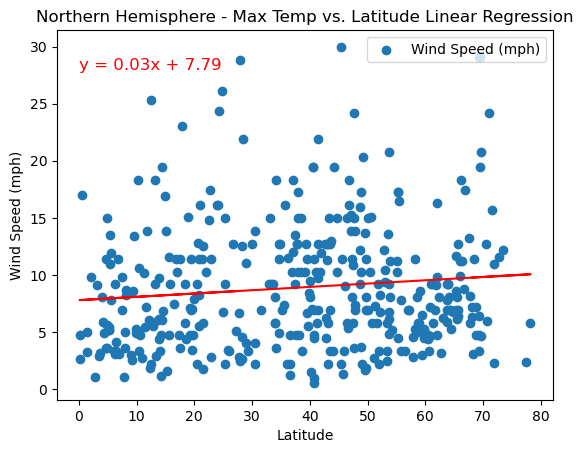

The r-value is 0.11


In [98]:
slope, inter, rvalue, pvalue, stderr = linregress(north_hem['Lat'], north_hem['Wind Speed'])
regress_values = north_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(north_hem['Lat'], north_hem['Wind Speed'])
plt.plot(north_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (0, 28), fontsize=12, color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend(['Wind Speed (mph)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_reg.png')
plt.show()
print(f'The r-value is {round(rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

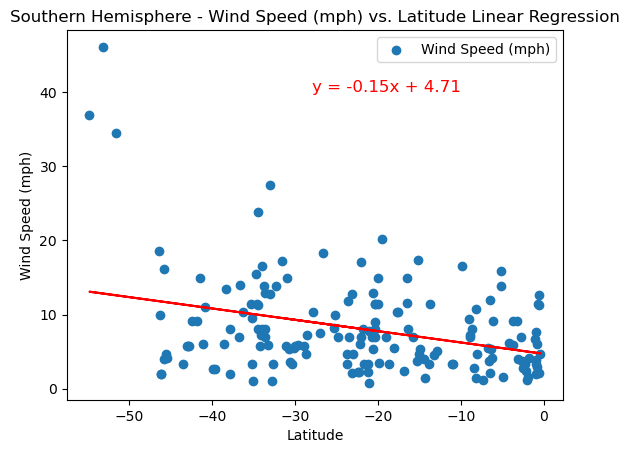

The r-value is -0.34


In [96]:
slope, inter, rvalue, pvalue, stderr = linregress(south_hem['Lat'], south_hem['Wind Speed'])
regress_values = south_hem['Lat'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(south_hem['Lat'], south_hem['Wind Speed'])
plt.plot(south_hem['Lat'],regress_values,"r-")
plt.annotate(line_eq, (-28, 40), fontsize=12, color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.legend(['Wind Speed (mph)'], loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f'The r-value is {round(rvalue,2)}')